## Bibliotecas

In [2]:
# Instalando bibliotecas faltantes no Google Colab
try:
    import pycaret
except:
    !pip install pycaret

try:
    import missingno
except:
    !pip install missingno

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 97.9 MB/s e

In [3]:
# Importando bibliotecas
# Bibliotecas de manipulação de dados
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import norm, skew

# Bibliotecas para visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Bibliotecas de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from pycaret.classification import *
from imblearn.over_sampling import SMOTE

# Bibliotecas de apoio
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Importando os dados
base_df = pd.read_csv('/content/drive/MyDrive/Colab_DataSets/Base.csv')
#card_org = base_df.copy()

## Análise exploratória dos dados

In [5]:
# Relação total de transações normais x fraudes
colors = ['SteelBlue', 'Yellow']
labels = ['Transação Normal', 'Transação Fraudulenta']
values = base_df['fraud_bool'].value_counts() / base_df['fraud_bool'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(
    hoverinfo='label+percent',
    textinfo='percent',
    textfont_size=20,
    marker=dict(colors=colors))
fig.update_layout(
    title_text='<b>Gráfico Exploratório de Fraudes</b>',
    title_font_color='black',
    title_font=dict(size=28),
    legend_title_font_color='black',
    paper_bgcolor='white',
    plot_bgcolor='white',
    font_color='black'
)

fig.show()

In [6]:
# Informações básicas
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [7]:
# Estatísticas básicas
base_df.describe()

fraud_bool          income  name_email_similarity  \
count  1000000.000000  1000000.000000         1000000.000000   
mean         0.011029        0.562696               0.493694   
std          0.104438        0.290343               0.289125   
min          0.000000        0.100000               0.000001   
25%          0.000000        0.300000               0.225216   
50%          0.000000        0.600000               0.492153   
75%          0.000000        0.800000               0.755567   
max          1.000000        0.900000               0.999999   

       prev_address_months_count  current_address_months_count  \
count             1000000.000000                1000000.000000   
mean                   16.718568                     86.587867   
std                    44.046230                     88.406599   
min                    -1.000000                     -1.000000   
25%                    -1.000000                     19.000000   
50%                    -1.000000                     52.000000   
75%                    12.000000                    130.000000   
max                   383.000000                    428.000000   

         customer_age  days_since_request  intended_balcon_amount  \
count  1000000.000000        1.000000e+06          1000000.000000   
mean        33.689080        1.025705e+00                8.661499   
std         12.025799        5.381835e+00               20.236155   
min         10.000000        4.036860e-09              -15.530555   
25%         20.000000        7.193246e-03               -1.181488   
50%         30.000000        1.517574e-02               -0.830507   
75%         40.000000        2.633069e-02                4.984176   
max         90.000000        7.845690e+01              112.956928   

         zip_count_4w     velocity_6h  ...  phone_mobile_valid  \
count  1000000.000000  1000000.000000  ...      1000000.000000   
mean      1572.692049     5665.296605  ...            0.889676   
std       1005.374565     3009.380665  ...            0.313293   
min          1.000000     -170.603072  ...            0.000000   
25%        894.000000     3436.365848  ...            1.000000   
50%       1263.000000     5319.769349  ...            1.000000   
75%       1944.000000     7680.717827  ...            1.000000   
max       6700.000000    16715.565404  ...            1.000000   

       bank_months_count  has_other_cards  proposed_credit_limit  \
count     1000000.000000   1000000.000000         1000000.000000   
mean           10.839303         0.222988             515.851010   
std            12.116875         0.416251             487.559902   
min            -1.000000         0.000000             190.000000   
25%            -1.000000         0.000000             200.000000   
50%             5.000000         0.000000             200.000000   
75%            25.000000         0.000000             500.000000   
max            32.000000         1.000000            2100.000000   

       foreign_request  session_length_in_minutes  keep_alive_session  \
count   1000000.000000             1000000.000000      1000000.000000   
mean          0.025242                   7.544940            0.576947   
std           0.156859                   8.033106            0.494044   
min           0.000000                  -1.000000            0.000000   
25%           0.000000                   3.103053            0.000000   
50%           0.000000                   5.114321            1.000000   
75%           0.000000                   8.866131            1.000000   
max           1.000000                  85.899143            1.000000   

       device_distinct_emails_8w  device_fraud_count           month  
count             1000000.000000           1000000.0  1000000.000000  
mean                    1.018312                 0.0        3.288674  
std                     0.180761                 0.0        2.209994  
min                    -1.000000                 0.0        0.00000

<Axes: >

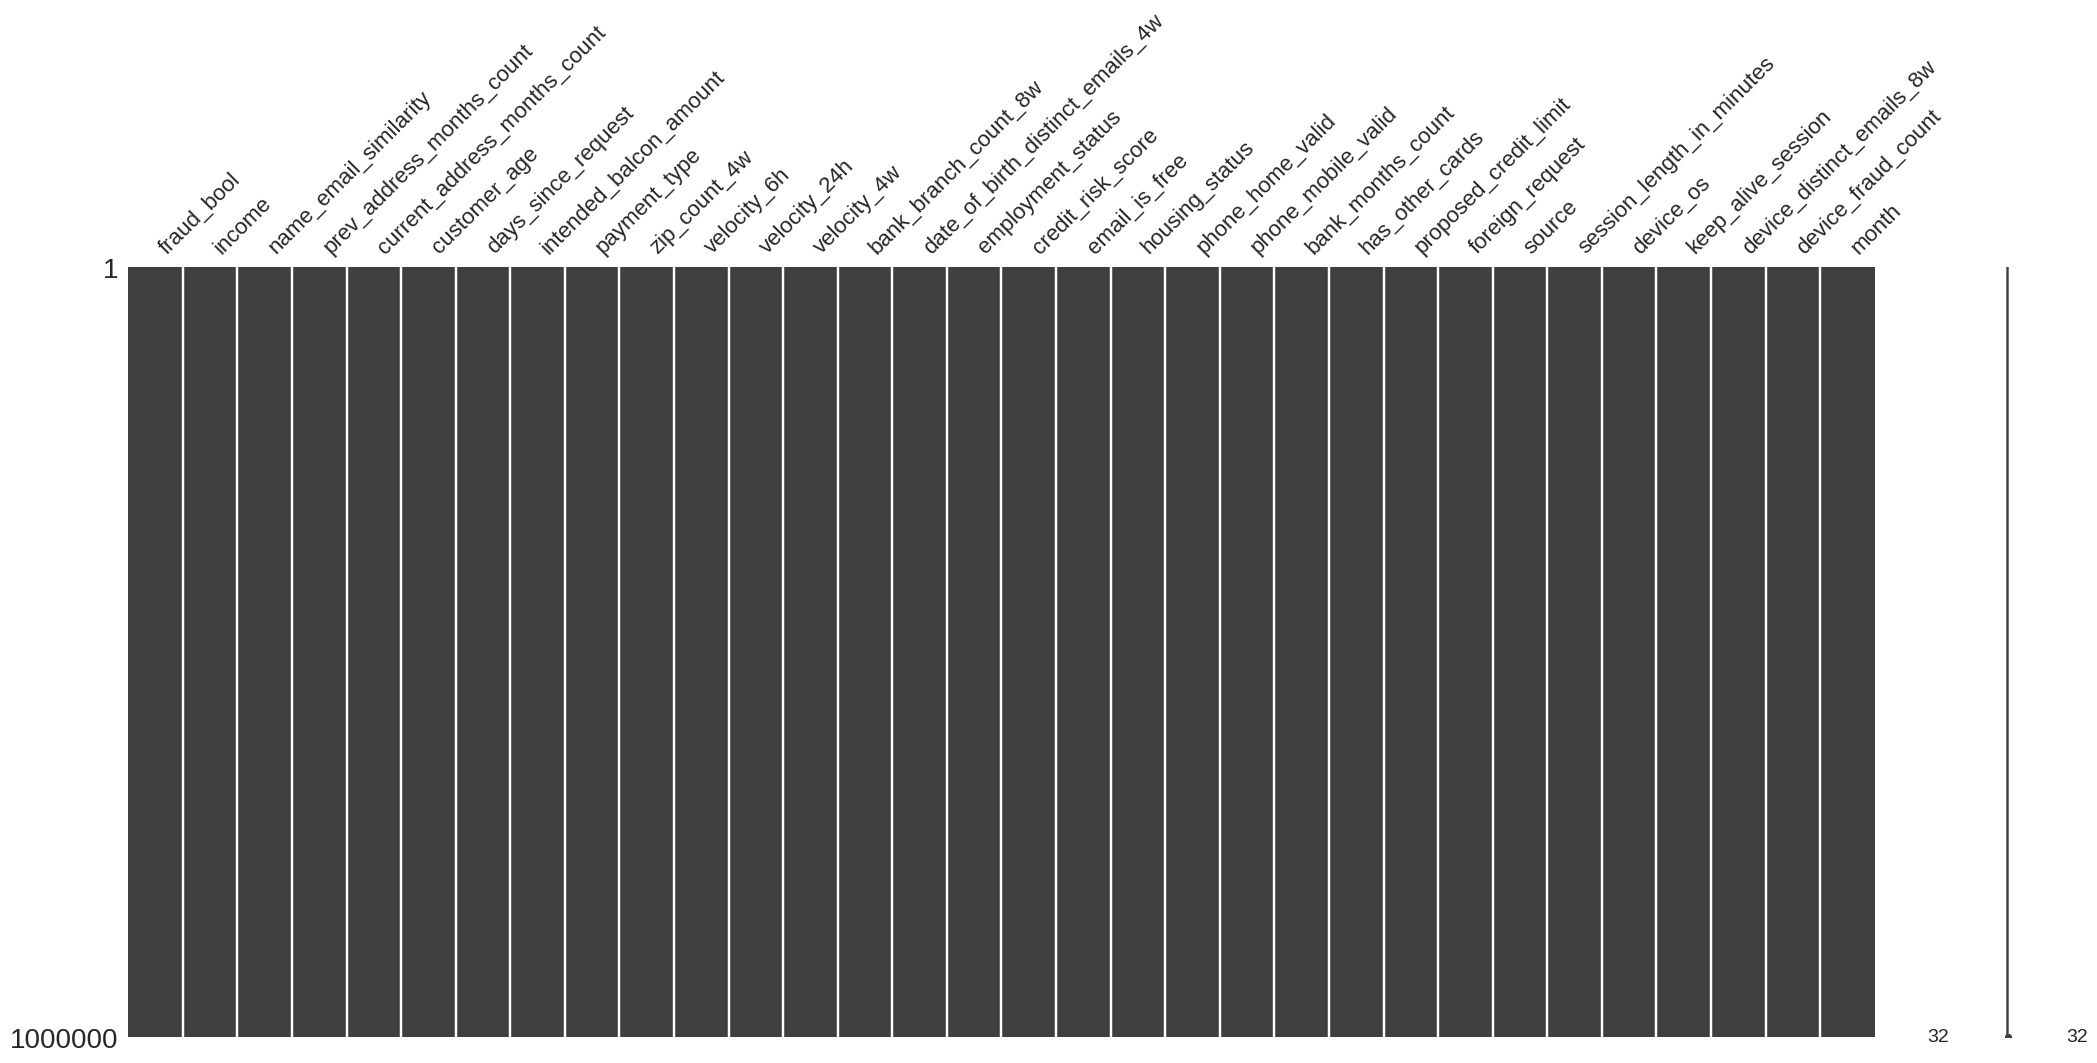

In [8]:
# Checando valores faltantes
msno.matrix(base_df)

## Processamento dos Dados

In [9]:
# Amostra aleatória de 50.000
base_df = base_df.sample(n = 50000, random_state = 0)
base_df.shape

(50000, 32)

In [10]:
# One Hot Encoding
# Binarização de variáveis categóricas
base_df = pd.get_dummies(base_df)
base_df.shape

(50000, 53)

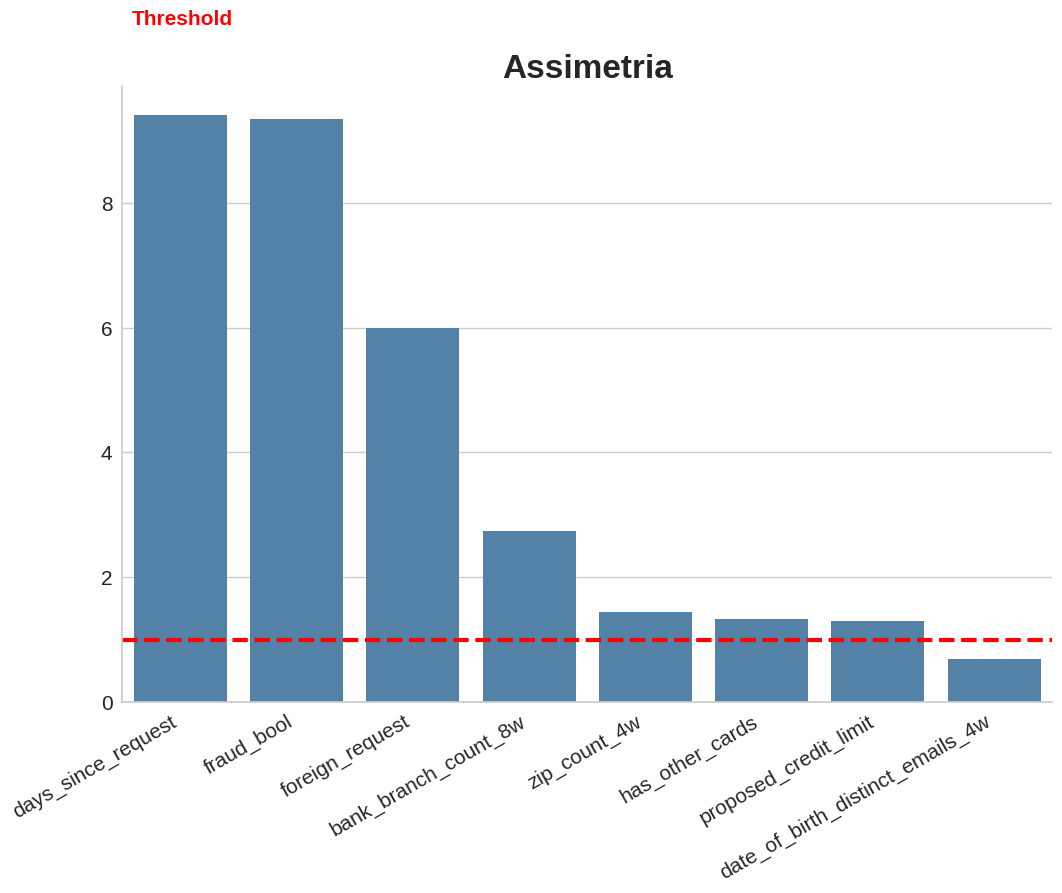

In [11]:
# Assimetria (skew)
# Separa valores numéricos até a coluna month
numerical_cols = [col_name for col_name in base_df.loc[:, :'month'].columns if
                  pd.to_numeric(base_df[col_name], errors='coerce').notna().all() and
                  base_df[col_name].min() >= 0 and
                  base_df[col_name].dtype in ['int64', 'float64']]

# Cria gráfico de skew
plt.figure(figsize=(12, 8))
skew_features = base_df[numerical_cols].apply(lambda x: skew(x))
skew_features = skew_features[skew_features > 0.5].sort_values(ascending=False)
ax = sns.barplot(x=skew_features.index, y=skew_features.values, color='SteelBlue')
ax.set_ylabel('', fontsize=20)
ax.set_xlabel('', fontsize=20)
ax.tick_params(axis='both', labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=15)
ax.axhline(y=1, color='red', linestyle='--', linewidth=3)
ax.set_title('Assimetria', ha = 'center', weight='bold', fontsize=24)
ax.text(0.01, 1.1, 'Threshold', color='red', transform=ax.transAxes, fontsize=15, weight='bold')
sns.despine()
plt.gca().set_facecolor('white')
plt.show()

days_since_request - Média: 1.0007, Desvio Padrão: 5.3541, Assimetria: 9.4007
------------------------------------------------------------------------------------
zip_count_4w - Média: 1574.7262, Desvio Padrão: 1006.4845, Assimetria: 1.4516
------------------------------------------------------------------------------------
proposed_credit_limit - Média: 515.3720, Desvio Padrão: 487.7632, Assimetria: 1.3032
------------------------------------------------------------------------------------


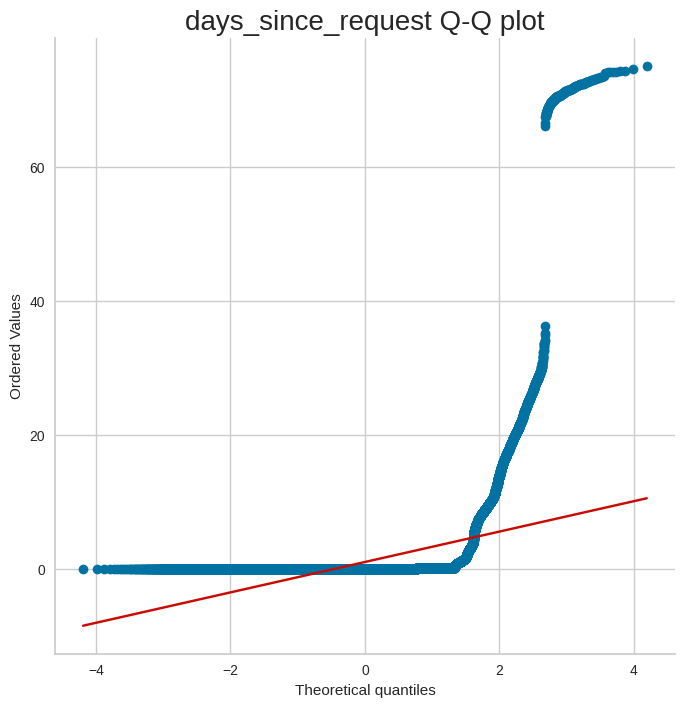

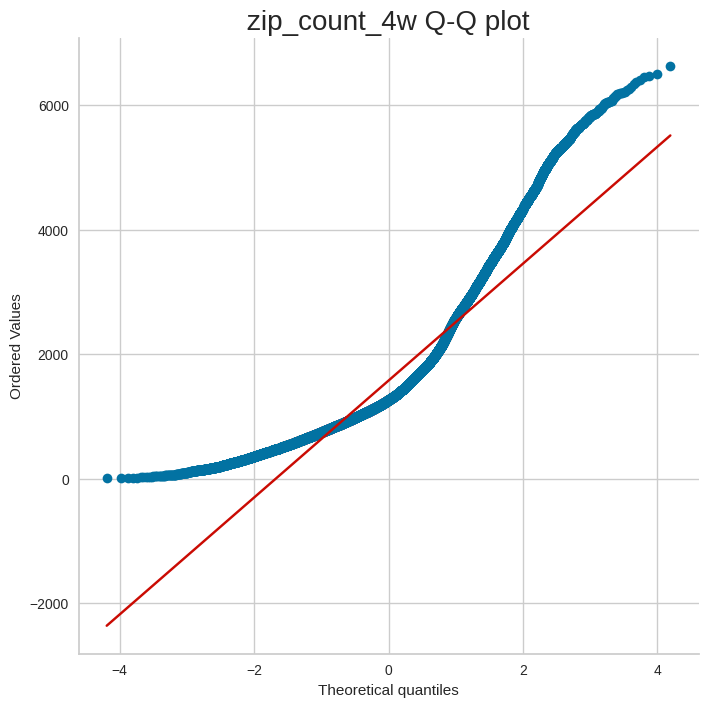

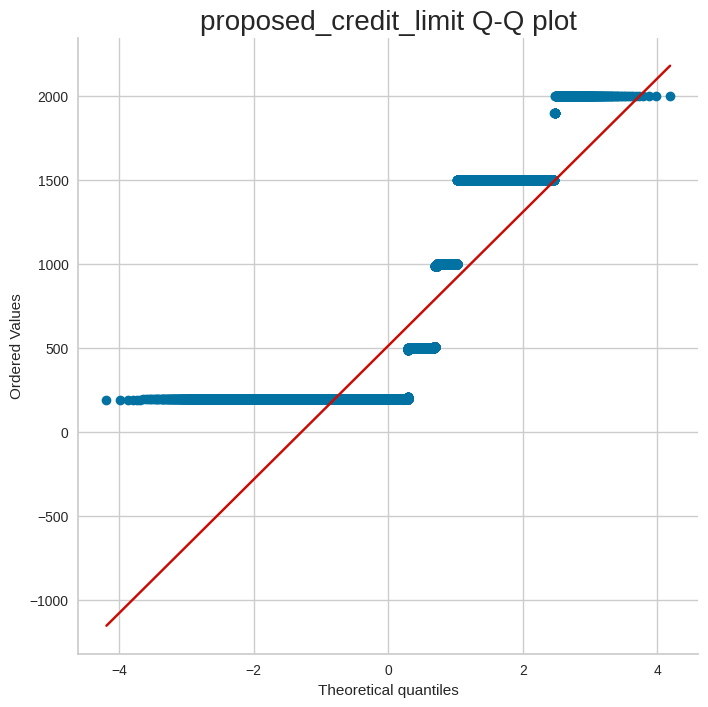

In [12]:
# Verificação de escala de recursos
def check_normality(var, dataframe):
    for var in var:
        plt.figure(figsize = (8,8))
        ax1 = plt.subplot(1,1,1)
        stats.probplot(dataframe[var], dist = stats.norm, plot = ax1)
        ax1.set_title(f'{var} Q-Q plot', fontsize=20)
        sns.despine()

        mean = dataframe[var].mean()
        std = dataframe[var].std()
        skew = dataframe[var].skew()
        print(f'{var} - Média: {mean:.4f}, Desvio Padrão: {std:.4f}, Assimetria: {skew:.4f}')
        print('------------------------------------------------------------------------------------')

vars = ['days_since_request', 'zip_count_4w', 'proposed_credit_limit']
check_normality(vars, base_df)

In [13]:
# Criação de histograma com sobreposição para análise
def plot_histograms(features, data_frame, color = None):
    for feature in features:
        fig = px.histogram(data_frame, x = feature, color = color, marginal = "box", barmode = "overlay", histnorm = 'density')
        fig.update_layout(title = f'Histograma de {feature}', xaxis_title = feature, yaxis_title = 'Densidade')
        fig.show()

# Lista de variáveis
features = ['days_since_request', 'zip_count_4w', 'proposed_credit_limit']
plot_histograms(features, base_df, color = 'fraud_bool')

In [14]:
# Escala logarítmica
# Lista de variáveis para transformação logarítmica
log = ['days_since_request', 'zip_count_4w', 'proposed_credit_limit']

# Aplica transformação logarítmica
base_df[log] = np.log1p(base_df[log])

# Teste de normalização após transformação logarítmica
def check_log_normality(df, vars):
    for var in vars:
        print(f'Teste de normalidade para {var}:')
        print('-------------------------------------')
        print('Assimetria:', skew(df[var]))
        print('Curtose:', df[var].kurtosis())
        print('-------------------------------------\n')

vars = ['days_since_request', 'zip_count_4w', 'proposed_credit_limit']
check_log_normality(base_df, vars)

Teste de normalidade para days_since_request:
-------------------------------------
Assimetria: 3.9194378335688684
Curtose: 15.245505822942203
-------------------------------------

Teste de normalidade para zip_count_4w:
-------------------------------------
Assimetria: -0.3452398390330225
Curtose: 1.4519848870737317
-------------------------------------

Teste de normalidade para proposed_credit_limit:
-------------------------------------
Assimetria: 0.8668526653243661
Curtose: -0.9285524229867779
-------------------------------------



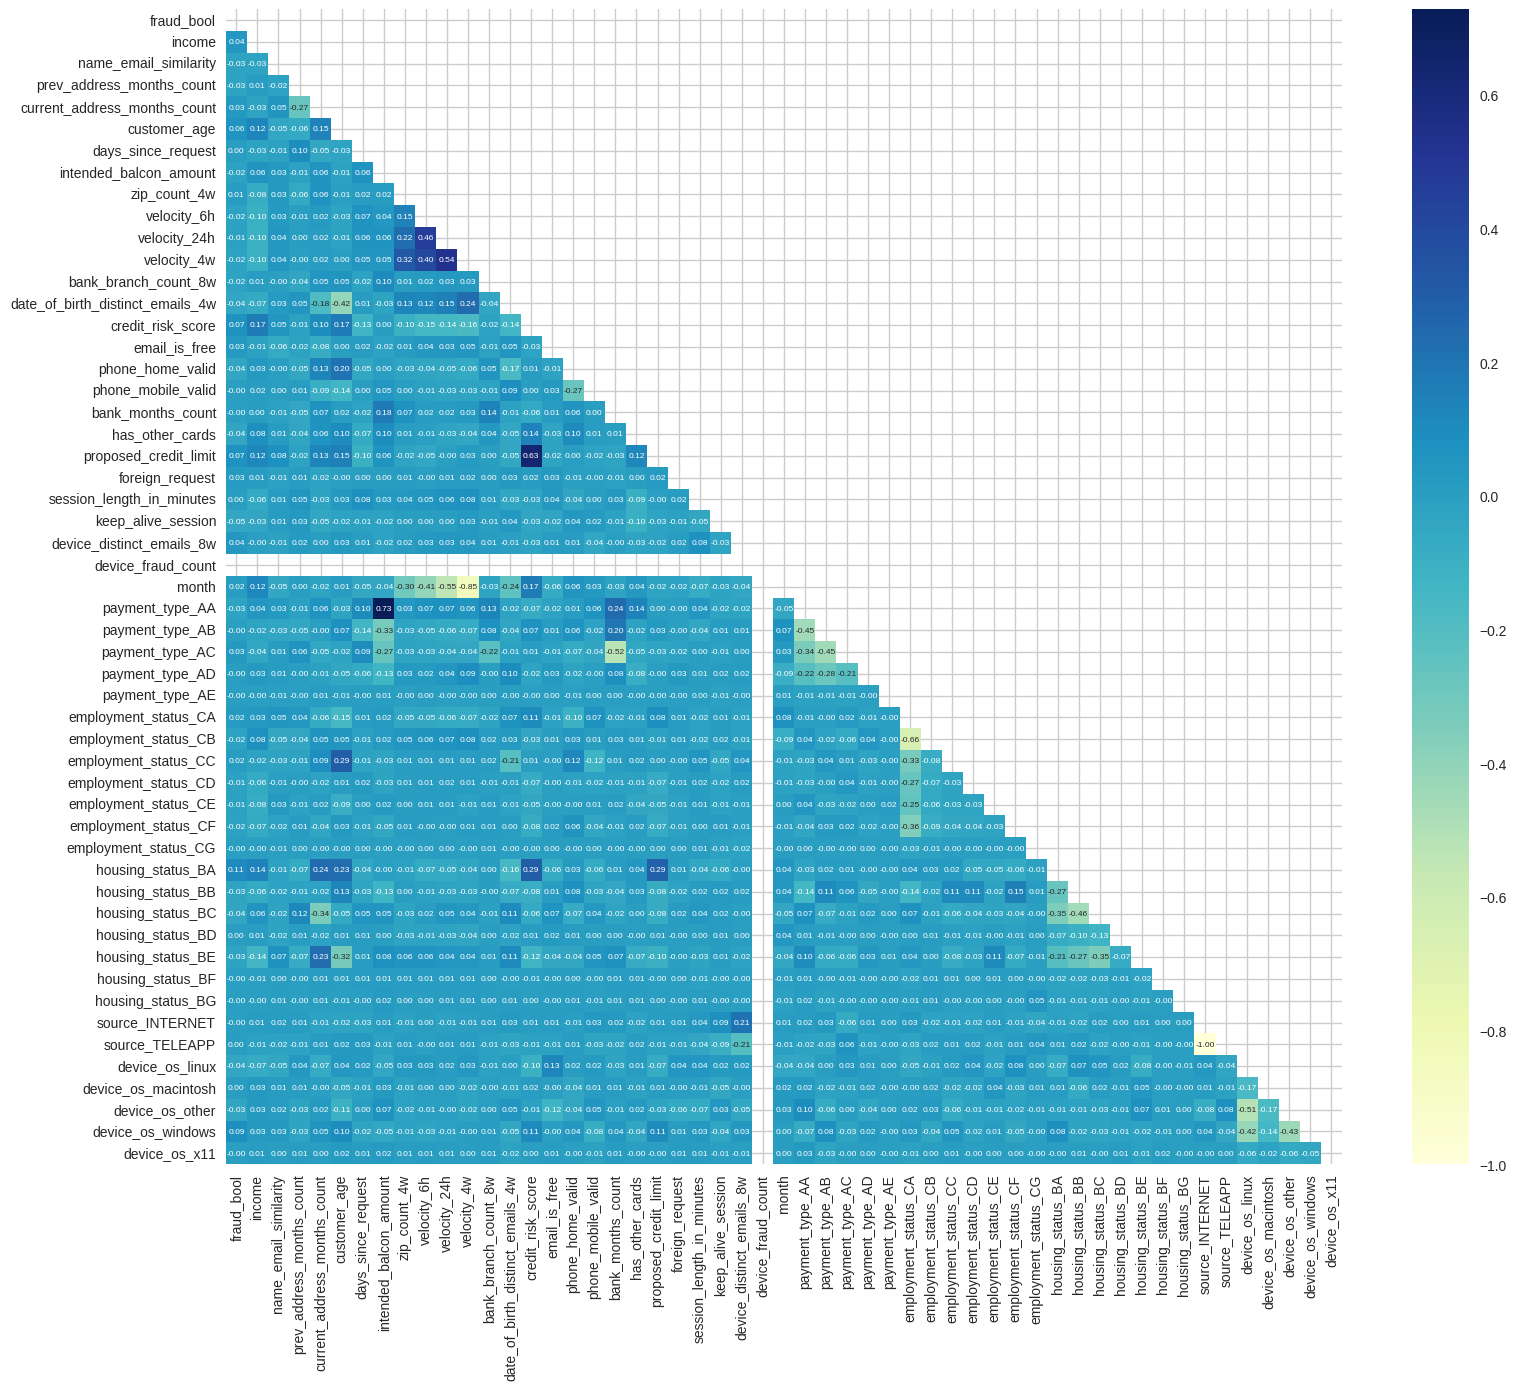

In [15]:
# Matriz de correlação
plt.figure(figsize=(18, 15))
cor = base_df.corr()
mask = np.triu(np.ones_like(cor))
heatmap = sns.heatmap(cor,
                      mask = mask,
                      annot = True,
                      cmap = plt.cm.YlGnBu,
                      annot_kws = {"fontsize": 6},
                      fmt = ".2f")
plt.show()

In [16]:
# Busca variáveis altamente correlacionadas
def drop_correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if  (corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_var = drop_correlation(base_df, 0.7)
print(corr_var)

{'payment_type_AA'}


In [17]:
base_df = base_df.drop('payment_type_AA', axis=1)

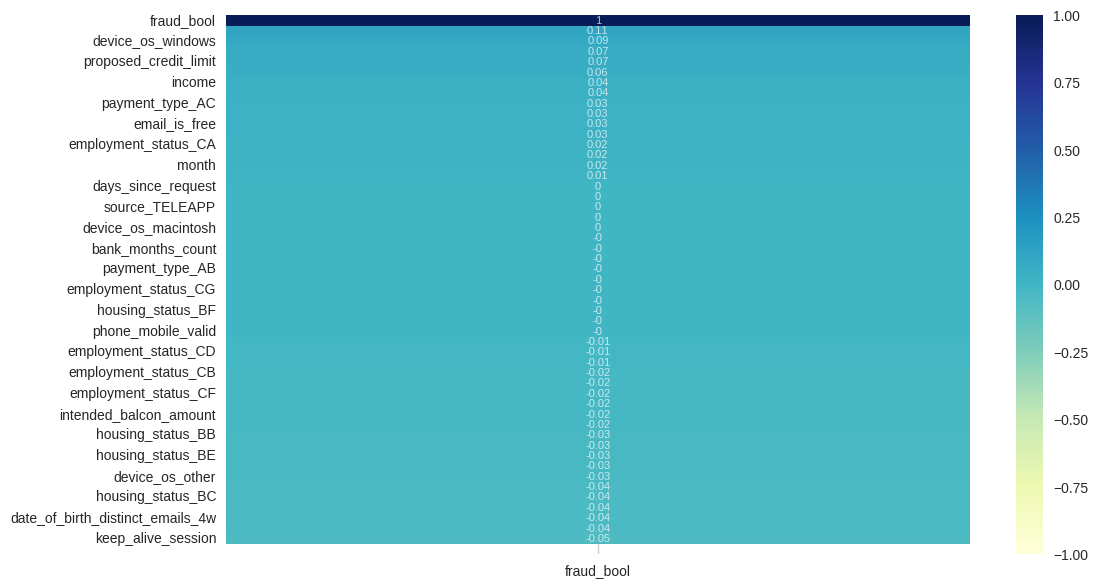

In [18]:
# Identificando as informações mais relevantes
plt.figure(figsize = (12, 7))
corr = base_df.corr()[['fraud_bool']].sort_values(by = 'fraud_bool', ascending = False)
corr = corr.round(2)
heatmap = sns.heatmap(corr,
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      cmap = 'YlGnBu',
                      annot_kws = {"size": 8, "color": 'white', "alpha": 0.7, "ha": 'center', "va": 'center'})

In [19]:
corr = base_df.corr().round(2)

# Busca de alta correlação com a coluna fraud_bool
target_corr = corr['fraud_bool'].abs().sort_values(ascending = False)
strong_corr = target_corr.index[1:11]

print('10 maiores correlações com fraud_bool:')
for x in strong_corr:
    print(f"{x}: {target_corr[x]}")

10 maiores correlações com fraud_bool:
housing_status_BA: 0.11
device_os_windows: 0.09
proposed_credit_limit: 0.07
credit_risk_score: 0.07
customer_age: 0.06
keep_alive_session: 0.05
income: 0.04
device_distinct_emails_8w: 0.04
has_other_cards: 0.04
phone_home_valid: 0.04


## Classificação desbalanceada

In [20]:
# Preparar e dividir os dados em um conjunto de treinamento e um conjunto de teste
def processed_data(df = None):
    df_copy = df.copy()
    target_var = df_copy.pop('fraud_bool')
    df_copy.insert(0, 'fraud_bool', target_var)
    return df_copy

def test_data(df = None):
    df_copy = processed_data(df)
    X_target = df_copy.iloc[:, 1:] # Remove a coluna alvo
    y_target = df_copy.iloc[:, 0]
    X_train, X_test, y_train, y_test = train_test_split(
        X_target,
        y_target,
        test_size = 0.3,
        random_state = 0,
        stratify = y_target)
    return X_train, X_test, y_train, y_test

In [21]:
X_train, X_test, y_train, y_test = test_data(base_df)

In [22]:
# Histograma
fig = px.histogram(base_df,
                   x = "customer_age",
                   color = "fraud_bool",
                   marginal = "box",
                   barmode = "overlay",
                   histnorm = 'density'
                  )
fig.update_layout(
    title_text = "Distribuição Original",
    title_font_color = "black",
    legend_title_font_color = "black",
    paper_bgcolor = "white",
    plot_bgcolor = 'white',
    font_color = "black",
)
fig.show()

In [23]:
# Gráfico de dispersão
fig = px.scatter(base_df,
                 x = "customer_age",
                 y = "credit_risk_score",
                 color = "fraud_bool")
fig.update_layout(
    title_text = "",
    title_font_color = "black",
    legend_title_font_color = "black",
    paper_bgcolor = "white",
    plot_bgcolor = 'white',
    font_color = "black",
)

In [24]:
# Oversampling com SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('Distribuição da fraud_bool após SMOTE:\n', pd.Series(y_train_smote).value_counts())
base_df_smote = pd.concat([X_train_smote, pd.DataFrame(y_train_smote, columns = ['fraud_bool'])], axis=1)

Distribuição da fraud_bool após SMOTE:
 0    34613
1    34613
Name: fraud_bool, dtype: int64


In [25]:
# Scatterplot
fig = px.scatter(base_df_smote,
                 x = "customer_age",
                 y = "credit_risk_score",
                 color = "fraud_bool")
fig.update_layout(
    title_text = "",
    title_font_color = "black",
    legend_title_font_color = "black",
    paper_bgcolor = "white",
    plot_bgcolor = 'white',
    font_color = "black",
)

In [26]:
# Analisando resultados
train_df = pd.concat([X_train_smote, y_train_smote], axis=1)
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

In [27]:
colors = ['SteelBlue', 'Yellow']
labels = ['Transação Normal', 'Transação Fraudulenta']
values = train_df['fraud_bool'].value_counts() / train_df['fraud_bool'].shape[0]
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors))
fig.update_layout(
    title_text='<b>Gráfico Exploratório de Fraudes</b>',
    title_font_color='black',
    title_font=dict(size=28),
    legend_title_font_color='black',
    paper_bgcolor='white',
    plot_bgcolor='white',
    font_color='black',
)

fig.show()

In [28]:
pycaret_setup = setup(data = train_df,
                      preprocess = False,
                      target = 'fraud_bool',
                      verbose = 1)

## Seleção de Modelo

In [29]:
# Criação de modelos com PyCaret
decisiontree = create_model('dt') # Árvore de Decisões
gbm = create_model('gbc') # Classificador de Impulso de Gradiente // Máquina de Impulso por Gradiente
logisticregression = create_model('lr') # Regressão Logística

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [30]:
# Tuning de hiperparâmetro
tuned_decisiontree = tune_model(decisiontree, optimize = 'AUC')
tuned_gradientboosting = tune_model(gbm, optimize = 'AUC')
tuned_logisticregression = tune_model(logisticregression, optimize = 'AUC')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


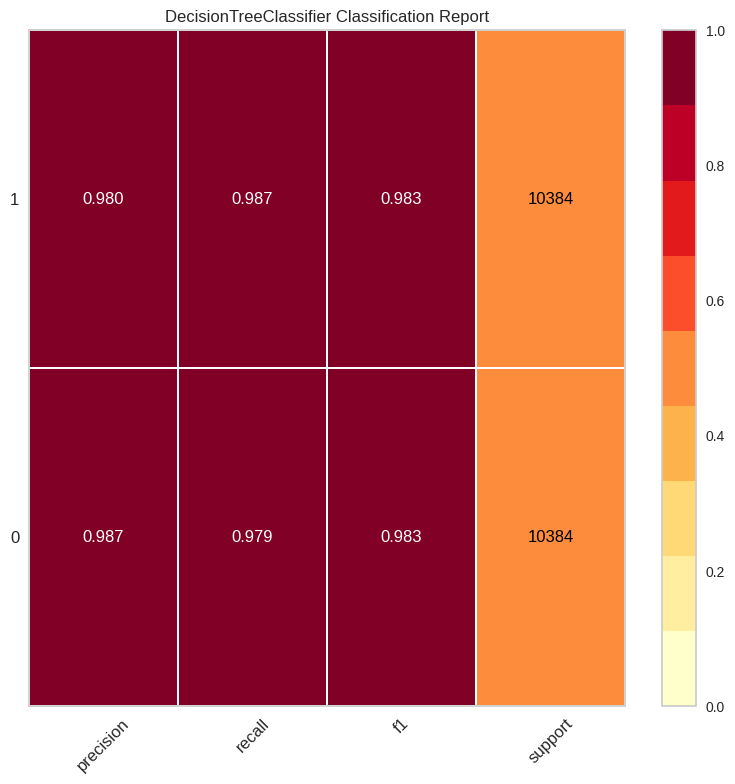

In [31]:
# Intepretando Modelos
# Árvore de decisões
plt.figure(figsize=(8,8))
plot_model(tuned_decisiontree, plot='class_report')

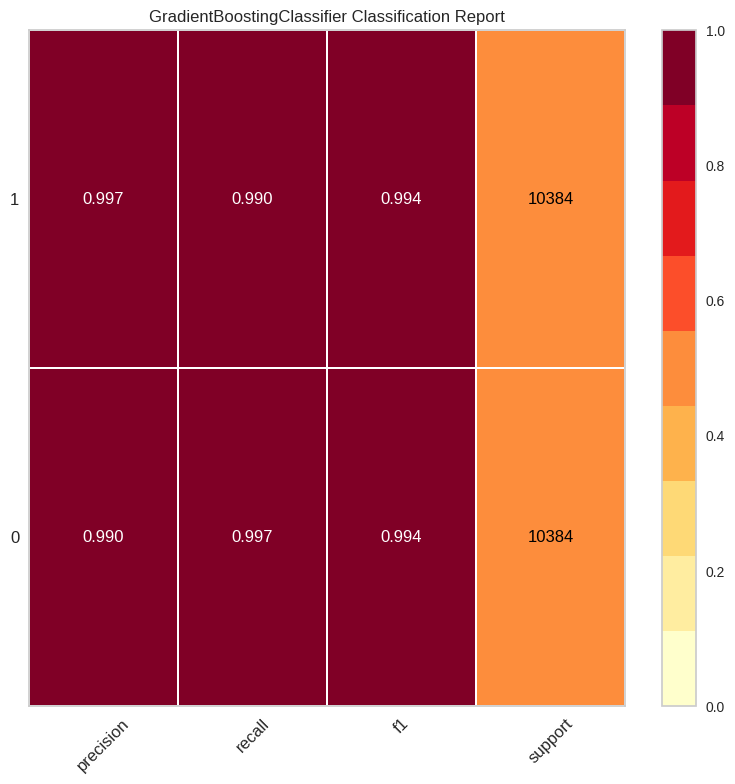

In [32]:
# GBM
plt.figure(figsize=(8,8))
plot_model(tuned_gradientboosting, plot='class_report')

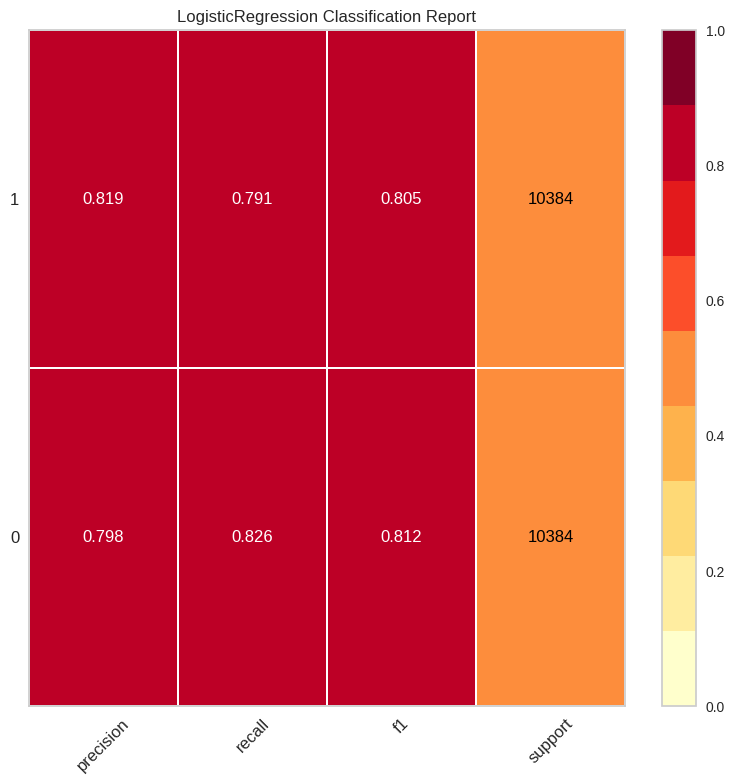

In [33]:
# Regressão Logística
plt.figure(figsize=(8,8))
plot_model(tuned_logisticregression, plot='class_report')

## Avaliação de Modelo

### Decision Tree

In [34]:
pred = tuned_decisiontree.predict(X_test_smote)

In [35]:
# Métricas de desempenho do modelo
final_model_result = confusion_matrix(y_test_smote, pred)
accuracy = accuracy_score(y_test_smote, pred)
precision = precision_score(y_test_smote, pred)
recall = recall_score(y_test_smote, pred)
f1 = f1_score(y_test_smote ,pred)
print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))

Accuracy: 0.9054, Precision: 0.9729, Recall: 0.8340, F1: 0.8981


Text(0.5, 1.0, 'Confusion Matrix (Decision Tree Classifier)')

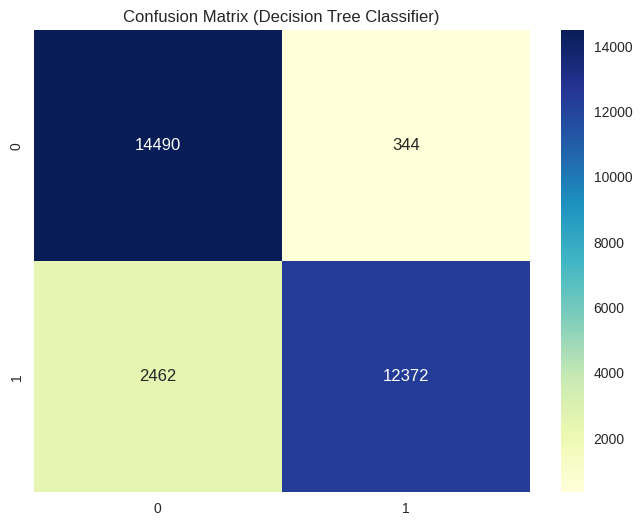

In [36]:
# Matriz confusão do modelo
plt.figure(figsize=(8,6))
ax = sns.heatmap(final_model_result, cmap = 'YlGnBu', annot = True, fmt = 'd')
ax.set_title('Confusion Matrix (Decision Tree Classifier)')

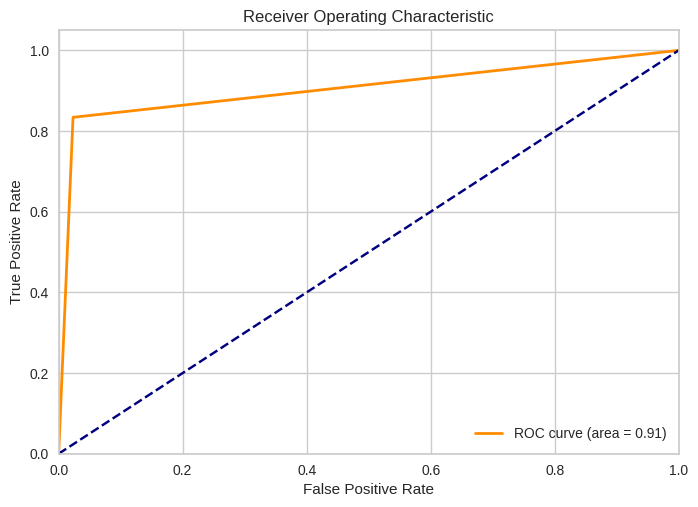

AUC: 0.9054


In [37]:
# Cálculo das curvas ROC e AUC
fpr, tpr, thresholds = roc_curve(y_test_smote, pred)
roc_auc = auc(fpr, tpr)

# Gráfico
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")
plt.show()

print('AUC: {0:.4f}'.format(roc_auc))

### Gradient Boost Machine

Repetem-se as comparações feitas no modelo de árvore de decisão.

In [39]:
pred = tuned_gradientboosting.predict(X_test_smote)

In [40]:
final_model_result = confusion_matrix(y_test_smote, pred)
accuracy = accuracy_score(y_test_smote, pred)
precision = precision_score(y_test_smote, pred)
recall = recall_score(y_test_smote, pred)
f1 = f1_score(y_test_smote, pred)
print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))

Accuracy: 0.9720, Precision: 0.9967, Recall: 0.9471, F1: 0.9713


Text(0.5, 1.0, 'Confusion Matrix (GBM Classifier)')

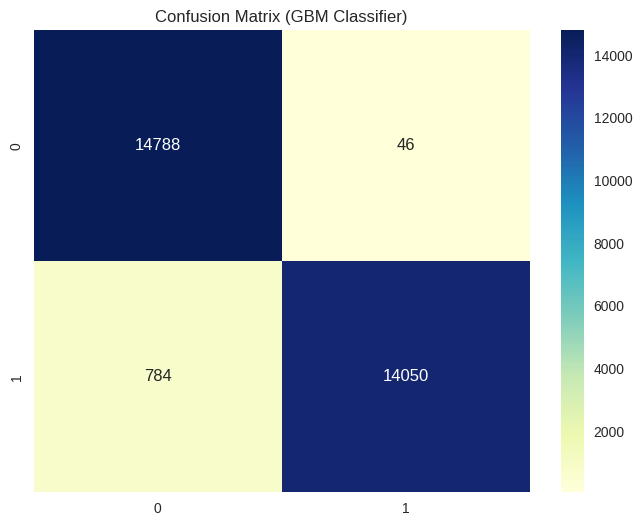

In [41]:
plt.figure(figsize=(8,6))
ax = sns.heatmap(final_model_result, cmap = 'YlGnBu', annot = True, fmt = 'd')
ax.set_title('Confusion Matrix (GBM Classifier)')

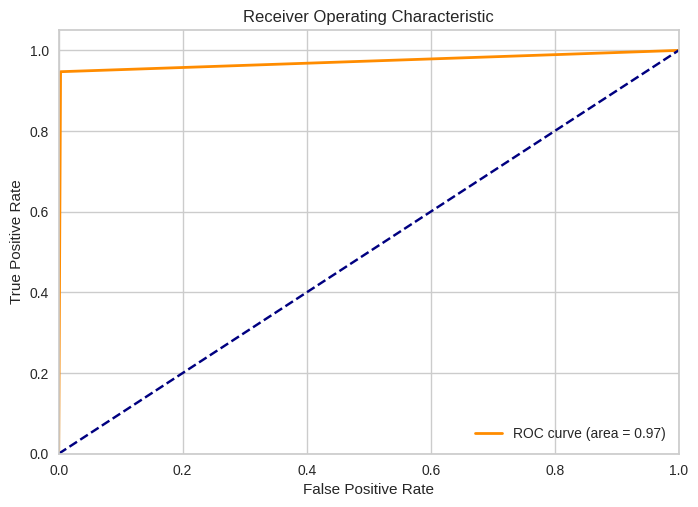

AUC: 0.9720


In [42]:
# Cálculo das curvas ROC e AUC
fpr, tpr, thresholds = roc_curve(y_test_smote, pred)
roc_auc = auc(fpr, tpr)

# Gráfico
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")
plt.show()

print('AUC: {0:.4f}'.format(roc_auc))

### Logistic Regression

Repetem-se as comparações feitas nos modelos anteriores.

In [43]:
pred = tuned_logisticregression.predict(X_test_smote)

In [44]:
final_model_result = confusion_matrix(y_test_smote, pred)
accuracy = accuracy_score(y_test_smote, pred)
precision = precision_score(y_test_smote, pred)
recall = recall_score(y_test_smote, pred)
f1 = f1_score(y_test_smote, pred)
print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))

Accuracy: 0.8054, Precision: 0.8154, Recall: 0.7896, F1: 0.8023


Text(0.5, 1.0, 'Confusion Matrix (Logistic Regression)')

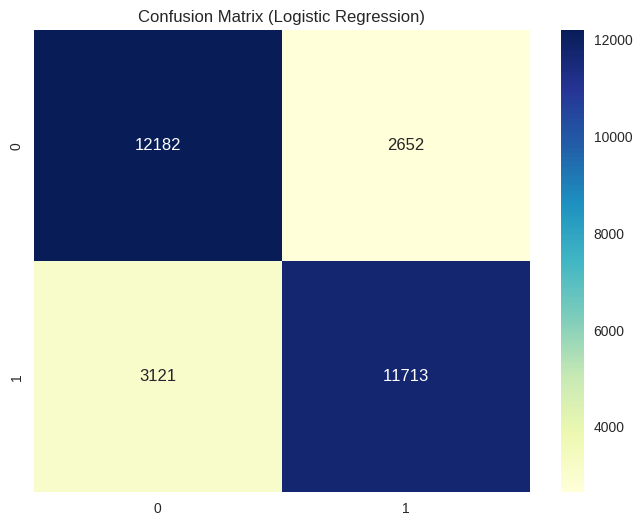

In [45]:
plt.figure(figsize=(8,6))
ax = sns.heatmap(final_model_result, cmap = 'YlGnBu', annot = True, fmt = 'd')
ax.set_title('Confusion Matrix (Logistic Regression)')

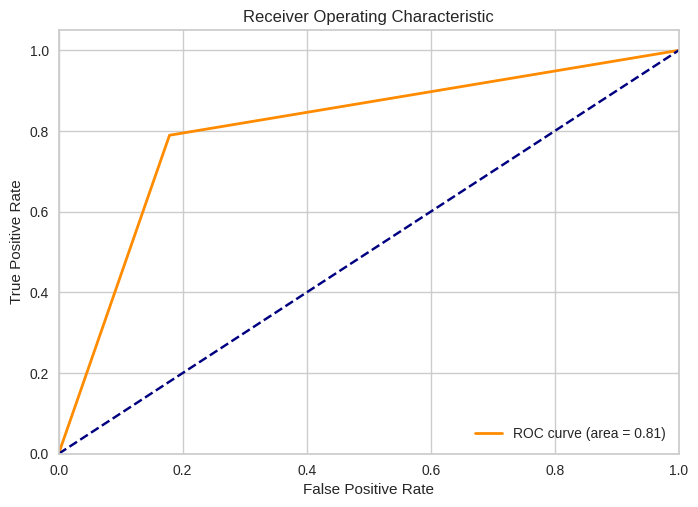

AUC: 0.8054


In [46]:
# Cálculo das curvas ROC e AUC
fpr, tpr, thresholds = roc_curve(y_test_smote, pred)
roc_auc = auc(fpr, tpr)

# Gráfico
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")
plt.show()

print('AUC: {0:.4f}'.format(roc_auc))

## Conclusão

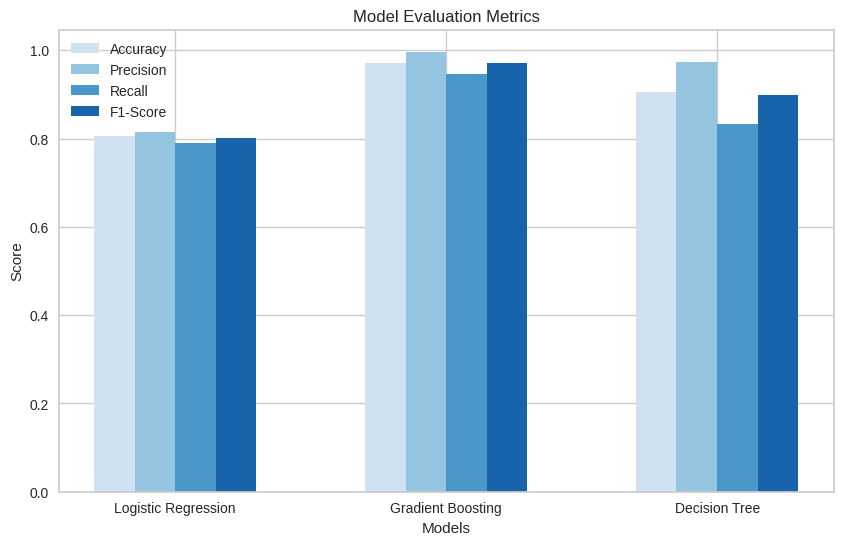

In [47]:
# Comparação geral dos três modelos estudados
models = [tuned_logisticregression, tuned_gradientboosting, tuned_decisiontree]
model_names = ['Logistic Regression', 'Gradient Boosting', 'Decision Tree']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

scores = []

for model in models:
    y_pred = model.predict(X_test_smote)
    accuracy = accuracy_score(y_test_smote, y_pred)
    precision = precision_score(y_test_smote, y_pred)
    recall = recall_score(y_test_smote, y_pred)
    f1 = f1_score(y_test_smote, y_pred)
    scores.append([accuracy, precision, recall, f1])

colors = plt.cm.Blues(np.linspace(0.2, 0.8, len(metrics)))

# Gráfico
plt.figure(figsize=(10, 6))
x = np.arange(len(model_names))
width = 0.15

for i, metric in enumerate(metrics):
    plt.bar(x + (i * width), [score[i] for score in scores], width, label=metric, color=colors[i])

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.xticks(x + (width * 1.5), model_names)
plt.legend()

plt.show()

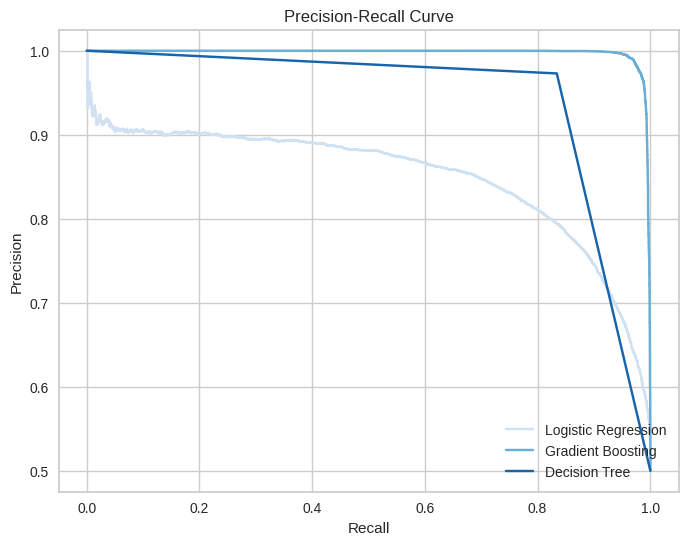

In [48]:
# Comparar as curvas de precisão-recall dos três modelos de estudo
models = [tuned_logisticregression, tuned_gradientboosting, tuned_decisiontree]
model_names = ['Logistic Regression', 'Gradient Boosting', 'Decision Tree']

plt.figure(figsize=(8, 6))

colors = plt.cm.Blues(np.linspace(0.2, 0.8, len(models)))

for model, name, color in zip(models, model_names, colors):
    y_pred_prob = model.predict_proba(X_test_smote)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test_smote, y_pred_prob)
    plt.plot(recall, precision, label = name, color = color)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc = 'lower right')

plt.show()

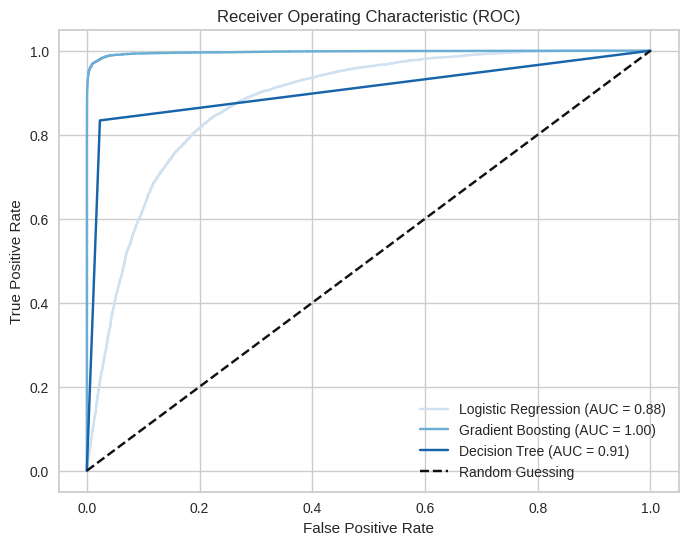

In [49]:
# Comparar as curvas ROC e as AUCs dos três modelos de estudo
models = [tuned_logisticregression, tuned_gradientboosting, tuned_decisiontree]
model_names = ['Logistic Regression', 'Gradient Boosting', 'Decision Tree']

plt.figure(figsize=(8, 6))

colors = plt.cm.Blues(np.linspace(0.2, 0.8, len(models)))

for model, name, color in zip(models, model_names, colors):
    y_pred_prob = model.predict_proba(X_test_smote)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test_smote, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})', color=color)

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

plt.show()